In [1]:
from pathlib import Path
import sys
import matplotlib.pyplot as plt
import pandas as pd

REPO_NAME = "cvpr_perturbations"
repo_root = None
cwd = Path.cwd().resolve()
for path in (cwd, *cwd.parents):
    if path.name == REPO_NAME:
        repo_root = path
        break
if repo_root is None:
    raise RuntimeError(
        f"Unable to locate '{REPO_NAME}' in the current working tree; adjust REPO_NAME or run from project root."
    )
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))

from notebooks.utils.load_training_data import load_training_results
from notebooks.utils.merge_neural_behavioral import merge_behavioral_and_neural
from notebooks.utils.na_vs_loss import plot_neural_alignment_vs_loss

In [2]:
baseline_seed1_ba_results = load_training_results(
    Path("../../data/training_results/baseline/training_res_seed1.csv"),
    truncate_at_min_test_loss=True,
)


baseline_seed2_ba_results = load_training_results(
    Path("../../data/training_results/baseline/training_res_seed2.csv"),
    truncate_at_min_test_loss=True,
)


baseline_seed3_ba_results = load_training_results(
    Path("../../data/training_results/baseline/training_res_seed3.csv"),
    truncate_at_min_test_loss=True,
)

In [5]:
baseline_seed1_things_na_results = pd.read_csv('../../data/brain_rsa_results/baseline/things/things_baseline_seed1_brain_rsa_results.csv')

baseline_seed2_things_na_results = pd.read_csv('../../data/brain_rsa_results/baseline/things/things_baseline_seed2_brain_rsa_results.csv')

baseline_seed3_things_na_results = pd.read_csv('../../data/brain_rsa_results/baseline/things/things_baseline_seed3_brain_rsa_results.csv')

In [6]:
baseline_seed1_things_df = merge_behavioral_and_neural(baseline_seed1_ba_results, baseline_seed1_things_na_results)

baseline_seed2_things_df = merge_behavioral_and_neural(baseline_seed2_ba_results, baseline_seed2_things_na_results)

baseline_seed3_things_df = merge_behavioral_and_neural(baseline_seed3_ba_results, baseline_seed3_things_na_results)

<Axes: xlabel='Test Loss', ylabel='Neural Alignment'>

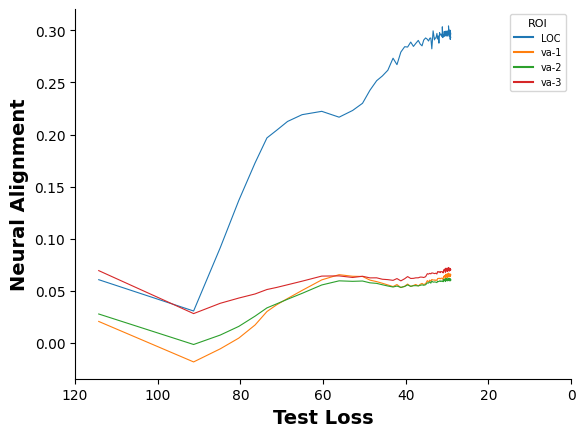

In [7]:
plot_neural_alignment_vs_loss(baseline_seed1_things_df)

<Axes: xlabel='Test Loss', ylabel='Neural Alignment'>

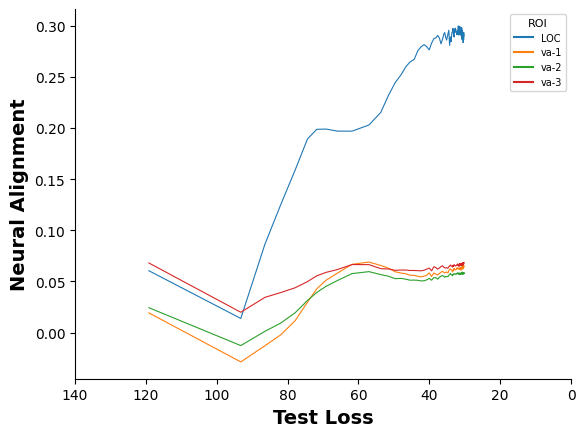

In [8]:
plot_neural_alignment_vs_loss(baseline_seed2_things_df)

<Axes: xlabel='Test Loss', ylabel='Neural Alignment'>

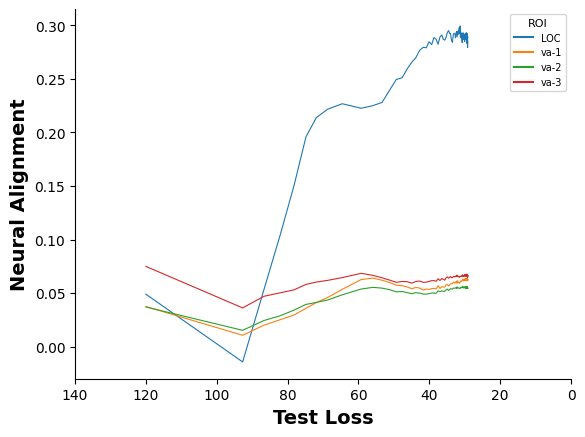

In [9]:
plot_neural_alignment_vs_loss(baseline_seed3_things_df)